<a href="https://colab.research.google.com/github/younhuiji/python/blob/main/py24_yob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 미국 신생아 이름 데이터 셋

* 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob1880.txt'
* 1880년 ~ 2010년 연도별로 파일이 나눠져 있음.
* 각 파일에는 '이름, 성별, 신생아수'가 comma(,)로 구분되어 있음.

In [ ]:
file_path = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob1880.txt'

In [ ]:
yob = pd.read_csv(file_path)
yob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    1999 non-null   object
 1   F       1999 non-null   object
 2   7065    1999 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


`pd.read_csv()`함수는 파일의 첫 번째 줄을 데이터프레임의 컬럼 이름으로 취급함(기본값).

CSV파일에 컬럼 이름이 포함되어 있지 않은 경우(파일의 첫번째 줄부터 데이터가 시작되는 경우)에는 컬럼 이름들을 함수의 argument로 전달해야 함.

In [ ]:
yob = pd.read_csv(file_path, names=['name', 'gender', 'births'])
yob.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   gender  2000 non-null   object
 2   births  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


각 TXT 파일을 읽어서 만들어진 연도별 데이터프레임을 저장하는 리스트를 만드세요.
(리스트의 길이는 131)

* 빈 리스트 변수 선언
* 1880 ~ 2010 반복
* 각 연도에서 데이터프레임 생성
    * 각각의 데이터프레임에서는 year 컬럼을 추가

In [ ]:
yob.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [ ]:
col_names=['name', 'gender', 'births'] # 데이터프레임의 컬럼 이름들
yobs=[] # 데이터프레임들을 저장할 리스트
for i in range(1880, 2011):
    file_path = f'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob{i}.txt'
    # print(file_path)
    # break
    df = pd.read_csv(file_path, names=col_names)
    df['year'] = i
    yobs.append(df) # 데이터프레임을 리스트에 추가

In [ ]:
len(yobs) # 2010 - 1880 + 1

131

리스트의 첫번째 원소 - 1880년 데이터프레임

In [ ]:
yobs[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


리스트의 마지막 원소 - 2010년 데이터프레임

In [ ]:
yobs[-1].head()

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


리스트에 있는 131개의 데이터프레임을 하나의 데이터프레임으로 합침.

In [ ]:
df = pd.concat(yobs)

In [ ]:
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
df.tail()

,name,gender,births,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 33837
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


In [ ]:
df.loc[0] # (비교, 주의) iloc[0] 다른 결과.

,name,gender,births,year
0,Mary,F,7065,1880
0,Mary,F,6919,1881
0,Mary,F,8149,1882
0,Mary,F,8012,1883
0,Mary,F,9217,1884
...,...,...,...,...
0,Emily,F,21365,2006
0,Emily,F,19322,2007
0,Emma,F,18765,2008
0,Isabella,F,22222,2009


In [ ]:
df = pd.concat(yobs, ignore_index=True)
# param ignore_index: 데이터프레임을 합칠 때 인덱스를 무시할 지 말지를 설정. 기본값은 False.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## 연도별 신생아 수, 시각화

In [ ]:
births_by_years = df.groupby('year').births.sum()
births_by_years

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64

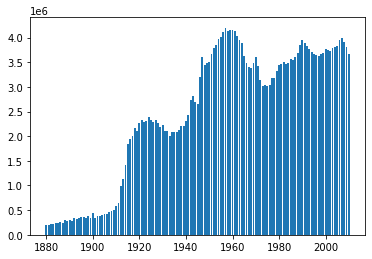

In [ ]:
plt.bar(x=births_by_years.index, height=births_by_years.values)
plt.show()

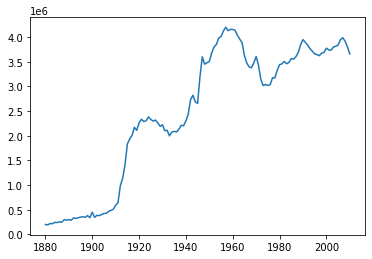

In [ ]:
plt.plot(births_by_years.index, births_by_years.values)
plt.show()

## 연도별 성별 신생아 수, 시각화

In [ ]:
births_by_year_gender = df.groupby(['year', 'gender']).births.sum()
births_by_year_gender # multi-level 인덱스를 갖는 series

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [ ]:
# multi-level 인덱스를 데이터프레임의 컬럼으로 변환
births_df = births_by_year_gender.reset_index()
births_df

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [ ]:
births_df.head()

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851


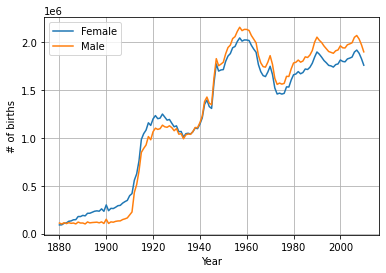

In [ ]:
births_female = births_df[births_df.gender == 'F']
births_male = births_df[births_df.gender == 'M']

plt.plot(births_female.year, births_female.births, label='Female')
plt.plot(births_male.year, births_male.births, label='Male')

plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('# of births')
plt.show()

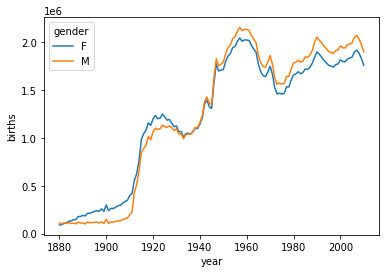

In [ ]:
sns.lineplot(data=df, x='year', y='births', hue='gender',
            estimator=np.sum, err_style=None)
plt.show()